# Problems with more than 1 output label

In [1]:
import os
import numpy as np
import pandas as pd

import tensorflow as tf
print(tf.__version__)

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2
2.5.0-rc2


# We are going to work on Fashion MNIST dataset

This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories,
along with a test set of 10,000 images. This dataset can be used as
a drop-in replacement for MNIST.

The classes are:

| Label | Description |
|:-----:|-------------|
|   0   | T-shirt/top |
|   1   | Trouser     |
|   2   | Pullover    |
|   3   | Dress       |
|   4   | Coat        |
|   5   | Sandal      |
|   6   | Shirt       |
|   7   | Sneaker     |
|   8   | Bag         |
|   9   | Ankle boot  |

In [65]:
# Load fashion MNIST dataset already present in tensorflow

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state= 42)

print(f'Train dataset shape: {x_train.shape} \nValidation dataset shape: {x_val.shape} \nTest dataset shape: {x_test.shape}')

Train dataset shape: (48000, 28, 28) 
Validation dataset shape: (12000, 28, 28) 
Test dataset shape: (10000, 28, 28)


In [47]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

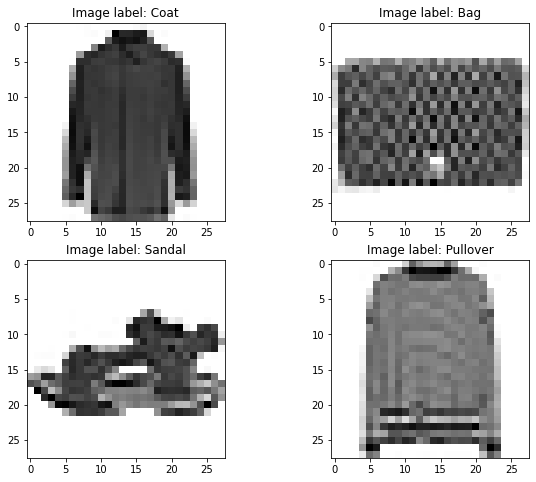

In [54]:
import random

fig = plt.figure(figsize= (10, 8))

for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    idx = random.randint(0, 48000)
    ax.imshow(x_train[idx], cmap = plt.cm.binary)
    ax.set_title(f'Image label: {class_names[y_train[idx]]}')

In [66]:
# Set random seed
tf.random.set_seed(42)

# Build the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

# Compile the model
model_1.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])


history_1 = model_1.fit(x_train, y_train, epochs = 20, validation_data= (x_val, y_val))

Epoch 1/20
1500/1500 [==============================] - 2s 943us/step - loss: 2.3296 - accuracy: 0.1342 - val_loss: 1.8936 - val_accuracy: 0.2052
Epoch 2/20
1500/1500 [==============================] - 1s 869us/step - loss: 1.7840 - accuracy: 0.2375 - val_loss: 1.7247 - val_accuracy: 0.2684
Epoch 3/20
1500/1500 [==============================] - 1s 904us/step - loss: 1.6903 - accuracy: 0.2723 - val_loss: 1.6625 - val_accuracy: 0.2869
Epoch 4/20
1500/1500 [==============================] - 1s 908us/step - loss: 1.6545 - accuracy: 0.2829 - val_loss: 1.6508 - val_accuracy: 0.2891
Epoch 5/20
1500/1500 [==============================] - 1s 871us/step - loss: 1.6267 - accuracy: 0.2874 - val_loss: 1.6219 - val_accuracy: 0.2828
Epoch 6/20
1500/1500 [==============================] - 1s 872us/step - loss: 1.6100 - accuracy: 0.2975 - val_loss: 1.6107 - val_accuracy: 0.3097
Epoch 7/20
1500/1500 [==============================] - 1s 873us/step - loss: 1.6017 - accuracy: 0.3054 - val_loss: 1.6487 -

In [68]:
# Normalizing the dataset

x_train_norm = x_train/255.0
x_val_norm = x_val/255.0
x_test_norm = x_test/255.0


In [70]:
# Set random seed
tf.random.set_seed(42)

# Build the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

# Compile the model
model_2.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])


history_2 = model_2.fit(x_train_norm, y_train, epochs = 20, validation_data= (x_val_norm, y_val))

Epoch 1/20
1500/1500 [==============================] - 2s 974us/step - loss: 1.1734 - accuracy: 0.6179 - val_loss: 0.7967 - val_accuracy: 0.7354
Epoch 2/20
1500/1500 [==============================] - 1s 894us/step - loss: 0.6993 - accuracy: 0.7560 - val_loss: 0.6706 - val_accuracy: 0.7654
Epoch 3/20
1500/1500 [==============================] - 1s 907us/step - loss: 0.6386 - accuracy: 0.7711 - val_loss: 0.6398 - val_accuracy: 0.7720
Epoch 4/20
1500/1500 [==============================] - 1s 907us/step - loss: 0.6153 - accuracy: 0.7791 - val_loss: 0.6229 - val_accuracy: 0.7740
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6001 - accuracy: 0.7827 - val_loss: 0.6209 - val_accuracy: 0.7738
Epoch 6/20
1500/1500 [==============================] - 1s 952us/step - loss: 0.5905 - accuracy: 0.7874 - val_loss: 0.6171 - val_accuracy: 0.7817
Epoch 7/20
1500/1500 [==============================] - 1s 897us/step - loss: 0.5842 - accuracy: 0.7885 - val_loss: 0.5988 - v

In [71]:
model_2.evaluate(x_test, y_test)

313/313 [==============================] - 0s 920us/step - loss: 161.9928 - accuracy: 0.6792


[161.99276733398438, 0.6791999936103821]

### Finding the ideal learning rate

In [92]:
# Set random seed
tf.random.set_seed(42)

# Build model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model_3.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics= ['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 10**(x/20))

history_3 = model_3.fit(x_train_norm, y_train, epochs= 40, callbacks= [lr_scheduler], validation_data=(x_val_norm, y_val))

Epoch 1/40
1500/1500 [==============================] - 2s 1ms/step - loss: 1.1734 - accuracy: 0.6179 - val_loss: 0.7967 - val_accuracy: 0.7354
Epoch 2/40
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6968 - accuracy: 0.7563 - val_loss: 0.6765 - val_accuracy: 0.7659
Epoch 3/40
1500/1500 [==============================] - 1s 936us/step - loss: 0.6363 - accuracy: 0.7719 - val_loss: 0.6355 - val_accuracy: 0.7733
Epoch 4/40
1500/1500 [==============================] - 1s 906us/step - loss: 0.6140 - accuracy: 0.7782 - val_loss: 0.6171 - val_accuracy: 0.7782
Epoch 5/40
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5990 - accuracy: 0.7833 - val_loss: 0.6144 - val_accuracy: 0.7803
Epoch 6/40
1500/1500 [==============================] - 1s 918us/step - loss: 0.5898 - accuracy: 0.7862 - val_loss: 0.6079 - val_accuracy: 0.7837
Epoch 7/40
1500/1500 [==============================] - 1s 916us/step - loss: 0.5835 - accuracy: 0.7875 - val_loss: 0.6141 - val_a

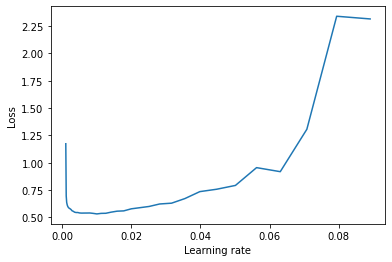

In [94]:
# Plot learning rate decay curve

lrs = 1e-3 * 10**(tf.range(40)/20)

plt.plot(lrs.numpy(), history_3.history['loss'])
plt.ylabel('Loss')
plt.xlabel('Learning rate')
plt.show()